In [2]:
import os
# loading model
import spacy

# creating dataframes
import pandas as pd

# visualization
import matplotlib.pyplot as plt

# removing metadata from files
import re

In [4]:
nlp = spacy.load("en_core_web_md")

In [5]:
main_folder_path = "../input/USEcorpus/"

In [6]:
sorted_dir = sorted(os.listdir(main_folder_path))

In [20]:
text.lower()

'\n how the understanding of wuthering heights is affected by the structure and the two narrators \nin this essay i will discuss the effect with the dual narrators in wuthering heights. i will also look at the structure and see what effect that has for the story. does the book become more interesting with the two narrators, and does the structure contribute to make the story better or does the book become less interesting to read with this construction? first i will discuss the two narrators before i comment on the structure.\n\t the main narrator is mr. lockwood but within his story nelly is the narrator. i think emily bronte has chosen mr. lockwood as the main narrator to make the story more reliable. he is a man and he comes from the upper class while nelly is a female servant. when the book was written it was more accepted with a male narrator than with a female, and i think that is why bronte has chosen mr. lockwood as her principal narrator.\n\t another reason for having two narr

In [9]:
for folder in sorted_dir:
    folder_path = os.path.join(main_folder_path, folder)
    filenames = sorted(os.listdir(folder_path))
    # creating a list for every folder's info to be gathered in. will be used to create dataframes later
    folder_info = []
    
    for text_file in filenames:
        file_path = folder_path + "/" + text_file
            
        with open (file_path, encoding="latin-1") as file:
            text = file.read()
            text = text.lower() # make everything lowercase
            # removing the metadata and document ID inside <>
            text = re.sub(r'<.+?>', '', text)
            # add text files to a doc object
            doc = nlp(text)
            # create counters for nouns, verbs, adjectives, and adverbs.
            noun_count = 0
            verb_count = 0
            adj_count = 0
            adv_count = 0

            # with a for loop, add 1 to the counter every time that part of speech appears in the doc object
            for token in doc:
                if token.pos_ == "NOUN":
                    noun_count += 1
                elif token.pos_ == "VERB":
                    verb_count += 1
                elif token.pos_ == "ADJ":
                    adj_count += 1
                elif token.pos_ == "ADV":
                    adv_count += 1
                
            # relative frequencies of nouns, verbs, adjectives, and adverbs per 10,000 words, rounded up to 2 decimals        
            relative_freq_noun = round((noun_count/len(doc)) * 10000, 2)
            relative_freq_verb = round((verb_count/len(doc)) * 10000, 2)
            relative_freq_adj = round((adj_count/len(doc)) * 10000, 2)
            relative_freq_adv = round((adv_count/len(doc)) * 10000, 2)
                
            # extracting named entities for persons, locations, and organizations
            persons = set()
            for ent in doc.ents:
                if ent.label_ == 'PERSON':
                    persons.add(ent.text)
            num_persons = len(persons)
            
            locations = set()
            for ent in doc.ents:
                if ent.label_ == 'LOC':
                    locations.add(ent.text)
            num_locations = len(locations)
                
            organisations = set()
            for ent in doc.ents:
                if ent.label_ == 'ORG':
                    organisations.add(ent.text)
            num_organisations = len(organisations)
                
            # create list for every file
            file_info = [text_file, relative_freq_noun, relative_freq_verb, relative_freq_adj, relative_freq_adv, num_persons, num_locations, num_organisations]
            # append the file's info to the collected list for the whole folder's info
            folder_info.append(file_info)
        
        # creating a dataframe with pandas using folder_info
        # make one per subfolder
            
        df = pd.DataFrame(folder_info,
                          columns=["Filename", "RelFreq NOUN", "RelFreq VERB", "RelFreq ADJ", "RelFreq ADV", "Unique PER", "Unique LOC", "Unique ORG"])

In [17]:
column

'Unique ORG'

In [45]:
all_files

[[1350.0, 1232.9, 695.7, 687.6, 0.5, 0.0, 0.0],
 [1851.8, 1129.9, 768.4, 499.9, 0.7, 0.3, 1.3],
 [1950.2, 1141.5, 684.4, 511.8, 1.6, 0.1, 0.9],
 [1495.2, 1124.3, 616.6, 425.9, 6.8, 0.1, 2.2],
 [1811.5, 1035.1, 736.2, 394.5, 5.7, 1.6, 2.7],
 [1955.9, 1044.4, 790.2, 541.7, 2.2, 0.3, 2.1],
 [1803.7, 1094.9, 726.6, 428.6, 4.0, 0.1, 2.9],
 [1660.6, 799.8, 738.4, 392.0, 14.0, 1.4, 12.8],
 [1378.4, 1093.0, 530.3, 446.2, 10.0, 0.0, 3.3],
 [1508.6, 1089.0, 625.9, 420.1, 10.5, 0.2, 2.6],
 [1598.2, 1248.8, 762.6, 509.0, 2.1, 0.0, 0.4],
 [1868.3, 1090.5, 859.7, 521.9, 1.4, 0.5, 1.4],
 [1694.1, 1076.7, 720.6, 485.2, 3.0, 1.0, 2.3],
 [1360.0, 1022.1, 508.6, 400.6, 22.1, 0.0, 5.0]]

In [48]:
averages

,RelFreq NOUN,RelFreq VERB,RelFreq ADJ,RelFreq ADV,Unique PER,Unique LOC,Unique ORG
0,1350.0,1232.9,695.7,687.6,0.5,0.0,0.0
1,1851.8,1129.9,768.4,499.9,0.7,0.3,1.3
2,1950.2,1141.5,684.4,511.8,1.6,0.1,0.9
3,1495.2,1124.3,616.6,425.9,6.8,0.1,2.2
4,1811.5,1035.1,736.2,394.5,5.7,1.6,2.7
5,1955.9,1044.4,790.2,541.7,2.2,0.3,2.1
6,1803.7,1094.9,726.6,428.6,4.0,0.1,2.9
7,1660.6,799.8,738.4,392.0,14.0,1.4,12.8
8,1378.4,1093.0,530.3,446.2,10.0,0.0,3.3
9,1508.6,1089.0,625.9,420.1,10.5,0.2,2.6


In [63]:
all_files

[[1350.0, 1232.9, 695.7, 687.6, 0.5, 0.0, 0.0],
 [1851.8, 1129.9, 768.4, 499.9, 0.7, 0.3, 1.3],
 [1950.2, 1141.5, 684.4, 511.8, 1.6, 0.1, 0.9],
 [1495.2, 1124.3, 616.6, 425.9, 6.8, 0.1, 2.2],
 [1811.5, 1035.1, 736.2, 394.5, 5.7, 1.6, 2.7],
 [1663.3, 1087.3, 697.4, 476.1, 6.0, 0.4, 2.9],
 [1955.9, 1044.4, 790.2, 541.7, 2.2, 0.3, 2.1],
 [1803.7, 1094.9, 726.6, 428.6, 4.0, 0.1, 2.9],
 [1660.6, 799.8, 738.4, 392.0, 14.0, 1.4, 12.8],
 [1378.4, 1093.0, 530.3, 446.2, 10.0, 0.0, 3.3],
 [1508.6, 1089.0, 625.9, 420.1, 10.5, 0.2, 2.6],
 [1598.2, 1248.8, 762.6, 509.0, 2.1, 0.0, 0.4],
 [1868.3, 1090.5, 859.7, 521.9, 1.4, 0.5, 1.4],
 [1694.1, 1076.7, 720.6, 485.2, 3.0, 1.0, 2.3],
 [1360.0, 1022.1, 508.6, 400.6, 22.1, 0.0, 5.0]]

In [7]:
all_files = [] # create empty list for the averages of each csv file to go into
column_names = ["RelFreq NOUN", "RelFreq VERB", "RelFreq ADJ", "RelFreq ADV", "Unique PER", "Unique LOC", "Unique ORG"] # list of column names
sorted_outputs = sorted(os.listdir("../output/")) # sorting the output directory
for csv in sorted_outputs:
    if csv.endswith(".csv"): # only load csv files
        current_file = pd.read_csv("../output/" + csv)
        file_info = [] # create a list for the current file
        for column in column_names:
            total = sum(current_file[column]) # finds the sum of results
            length = len(current_file) # finds the amount of files
            average = round(total/length, 1)
            
            file_info.append(average) # add averages
        all_files.append(file_info)

# list of every csv file's name
csv_list = ["a1", "a2", "a3", "a4", "a5", "b1", "b2", "b3", "b4", "b5", "b6", "b7", "b8", "c1"]
averages = pd.DataFrame(all_files, columns=column_names, index = csv_list) # creating a dataframe for every newspaper using pandas

# upload dataframe to output folder
averages.to_csv("../output/average/averages.csv", index=False)
    

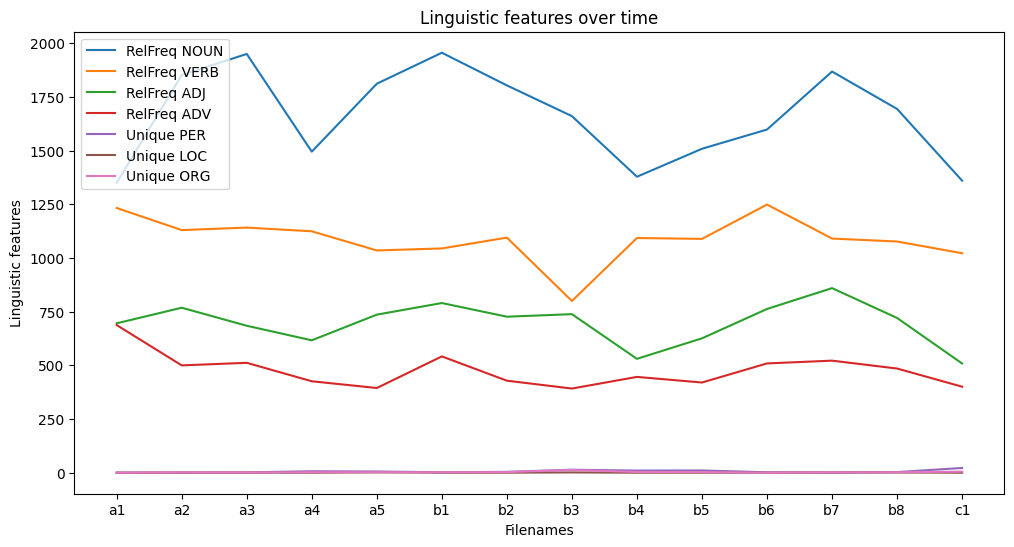

In [73]:
# plotting
plt.figure(figsize=(12,6))
plt.plot(averages)
plt.legend(column_names, loc='upper left')
plt.title("Linguistic features over time")
plt.xlabel("Filenames")
plt.ylabel("Linguistic features")

plt.savefig('../output/average/plot.png') # save output